In [1]:
import torch

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from torch import nn
import torch.nn.functional as tf
from torch import optim
from torchvision import transforms, datasets, models
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, auc
from sklearn.model_selection import train_test_split

from collections import Counter

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_class = pd.read_csv("class_data.csv")
df_class

,Unnamed: 0,ID,CRN,SUBJECT,SUBJECT_D,NUMBER,Unnamed: 6,LEVEL,IPEDS_Ethnicity,GENDER,...,CITIZENSHIP_DESC,First_Term_Major,Freshman_Major,Freshman_Major_DESC,Transfer_Major,Transfer_Hours,Transfer_GPA,Transfer_Major_DESC,PR_ZIP,GRADE
0,0,500455,10338,MA,MA - Mathematics,113,NaN,UG,White,F,...,U.S. Citizen,Elementary Education,NaN,NaN,NaN,3.0,0.0,NaN,35634-6115,C
1,1,500455,10896,QM,QM - Quantitative Methods,291,NaN,UG,White,F,...,U.S. Citizen,Elementary Education,NaN,NaN,NaN,3.0,0.0,NaN,35634-6115,A
2,2,500455,12674,CIS,CIS - Computer Info Systems,236,NaN,UG,White,F,...,U.S. Citizen,Elementary Education,NaN,NaN,NaN,3.0,0.0,NaN,35634-6115,A
3,3,500455,14379,CIS,CIS - Computer Info Systems,289,NaN,UG,White,F,...,U.S. Citizen,Elementary Education,NaN,NaN,NaN,3.0,0.0,NaN,35634-6115,A
4,4,500455,14744,CS,CS - Computer Science,135,NaN,UG,White,F,...,U.S. Citizen,Elementary Education,NaN,NaN,NaN,3.0,0.0,NaN,35634-6115,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,12508,706129,11353,HI,HI - History,201,NaN,UG,White,M,...,U.S. Citizen,Computer Science,CSCI,Computer Science,NaN,NaN,NaN,NaN,35614-6645,NaN
12509,12509,706129,13995,CS,CS - Computer Science,135,NaN,UG,White,M,...,U.S. Citizen,Computer Science,CSCI,Computer Science,NaN,NaN,NaN,NaN,35614-6645,NaN
12510,12510,706129,14216,EN,EN - English,99,NaN,UG,White,M,...,U.S. Citizen,Computer Science,CSCI,Computer Science,NaN,NaN,NaN,NaN,35614-6645,NaN
12511,12511,706129,14505,FYE,FYE- First Year Experience,101,NaN,UG,White,M,...,U.S. Citizen,Computer Science,CSCI,Computer Science,NaN,NaN,NaN,NaN,35614-6645,NaN


In [5]:
df_class.sort_values(by=['ID'])

,Unnamed: 0,ID,CRN,SUBJECT,SUBJECT_D,NUMBER,Unnamed: 6,LEVEL,IPEDS_Ethnicity,GENDER,...,CITIZENSHIP_DESC,First_Term_Major,Freshman_Major,Freshman_Major_DESC,Transfer_Major,Transfer_Hours,Transfer_GPA,Transfer_Major_DESC,PR_ZIP,GRADE
0,0,500455,10338,MA,MA - Mathematics,113,NaN,UG,White,F,...,U.S. Citizen,Elementary Education,NaN,NaN,NaN,3.0,0.0,NaN,35634-6115,C
22,22,500455,32420,QM,QM - Quantitative Methods,662,NaN,GR,White,F,...,U.S. Citizen,Elementary Education,NaN,NaN,NaN,3.0,0.0,NaN,35634-6115,W
21,21,500455,32412,AC,AC - Accounting,642,NaN,GR,White,F,...,U.S. Citizen,Elementary Education,NaN,NaN,NaN,3.0,0.0,NaN,35634-6115,C
20,20,500455,22769,CIS,CIS - Computer Info Systems,660,NaN,GR,White,F,...,U.S. Citizen,Elementary Education,NaN,NaN,NaN,3.0,0.0,NaN,35634-6115,A
19,19,500455,22768,CIS,CIS - Computer Info Systems,645,NaN,GR,White,F,...,U.S. Citizen,Elementary Education,NaN,NaN,NaN,3.0,0.0,NaN,35634-6115,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12510,12510,706129,14216,EN,EN - English,99,NaN,UG,White,M,...,U.S. Citizen,Computer Science,CSCI,Computer Science,NaN,NaN,NaN,NaN,35614-6645,NaN
12511,12511,706129,14505,FYE,FYE- First Year Experience,101,NaN,UG,White,M,...,U.S. Citizen,Computer Science,CSCI,Computer Science,NaN,NaN,NaN,NaN,35614-6645,NaN
12508,12508,706129,11353,HI,HI - History,201,NaN,UG,White,M,...,U.S. Citizen,Computer Science,CSCI,Computer Science,NaN,NaN,NaN,NaN,35614-6645,NaN
12509,12509,706129,13995,CS,CS - Computer Science,135,NaN,UG,White,M,...,U.S. Citizen,Computer Science,CSCI,Computer Science,NaN,NaN,NaN,NaN,35614-6645,NaN


In [6]:
df_grad = pd.read_csv("graduation_data.csv")
df_grad

,Unnamed: 0,ID,IPEDS_Ethnicity,GENDER,DEG_1,Major,HS_GPA,AGE_x,Housing,Greek_Org,...,ACT_E,ACT_M,ACT_R,ACT_S,SAT_V,SAT_M,SAT_T,SPORT,GREEK,Graduated_In_Major
0,0,500336,American Indian or Alaskan Native,F,BBA,Computer Information Systems,2.63,32,No,No,...,17.0,16.0,18.0,19.0,NaN,NaN,NaN,NaN,NaN,Yes
1,1,500584,White,M,BBA,Computer Information Systems,NaN,47,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,2,500589,White,M,BBA,Computer Information Systems,NaN,34,No,No,...,17.0,19.0,16.0,20.0,NaN,NaN,NaN,NaN,NaN,Yes
3,3,500639,White,M,BBA,Computer Information Systems,1.77,34,No,No,...,20.0,15.0,20.0,21.0,NaN,NaN,NaN,NaN,NaN,Yes
4,4,500980,White,F,BBA,Computer Information Systems,NaN,53,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1306,704969,White,F,BSCS,Computer Science,3.62,25,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,1307,705435,Black or African American,M,BBA,Computer Information Systems,NaN,24,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,1308,705551,White,M,BS,Information Technology,3.65,20,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,1309,705618,Asian,M,BSCS,Computer Science,NaN,21,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Comparison between ppl enrolled in class and ppl graduated

In [8]:
df_class.columns

Index(['Unnamed: 0', 'ID', 'CRN', 'SUBJECT', 'SUBJECT_D', 'NUMBER',
       'Unnamed: 6', 'LEVEL', 'IPEDS_Ethnicity', 'GENDER', 'DEG_1', 'Major',
       'HS_GPA', 'AGE', 'Housing', 'Greek_Org', 'Athlete', 'ACT_ENGLISH',
       'ACT_MATH', 'ACT_READING', 'ACT_SCIENCE_REASONING', 'ACT_COMPOSITE',
       'SAT_VERBAL', 'SAT_MATH', 'SAT_TOTAL', 'NAT_OF_CITIZENSHIP_DESC',
       'CITIZENSHIP_TYPE', 'CITIZENSHIP_DESC', 'First_Term_Major',
       'Freshman_Major', 'Freshman_Major_DESC', 'Transfer_Major',
       'Transfer_Hours', 'Transfer_GPA', 'Transfer_Major_DESC', 'PR_ZIP',
       'GRADE'],
      dtype='object')

In [9]:
df_grad.columns

Index(['Unnamed: 0', 'ID', 'IPEDS_Ethnicity', 'GENDER', 'DEG_1', 'Major',
       'HS_GPA', 'AGE_x', 'Housing', 'Greek_Org', 'Athlete', 'ACT_ENGLISH',
       'ACT_MATH', 'ACT_READING', 'ACT_SCIENCE_REASONING', 'ACT_COMPOSITE',
       'CITIZENSHIP_DESC_x', 'First_Term_Major', 'Freshman_Major_x',
       'Unnamed: 19', 'Left_Major_Major', 'Degree', 'Degree_Desc', 'Maj1',
       'Maj1_Desc', 'CUM_Instiution_GPA', 'CUM_Institution_GPA_Hours',
       'CITIZENSHIP_DESC_y', 'Gender', 'AGE_y', 'First_Time_Freshman',
       'Freshman_Major_y', 'ACT_C', 'ACT_E', 'ACT_M', 'ACT_R', 'ACT_S',
       'SAT_V', 'SAT_M', 'SAT_T', 'SPORT', 'GREEK', 'Graduated_In_Major'],
      dtype='object')

In [10]:
df_class['LEVEL'].value_counts()

UG    12478
GR       35
Name: LEVEL, dtype: int64

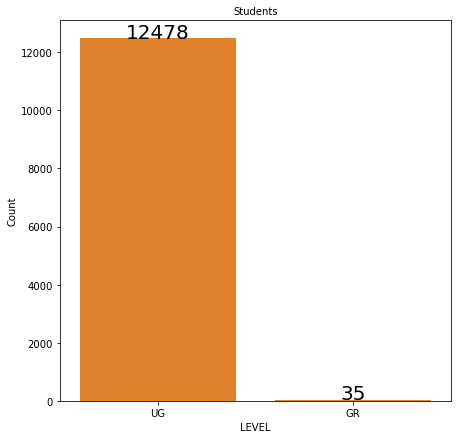

In [11]:
plt.figure(figsize=(7,7))
base_color=sns.color_palette()[1]
sns.countplot(data=df_class, x='LEVEL',color=base_color)
plt.title('Students',fontsize=10)
plt.ylabel('Count',fontsize=10)

locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = df_class['LEVEL'].value_counts()[label.get_text()]
    pct_string = '{:}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black',fontsize=20)

In [12]:
df_class['LEVEL'].tail(150)

12363    UG
12364    UG
12365    UG
12366    UG
12367    UG
         ..
12508    UG
12509    UG
12510    UG
12511    UG
12512    UG
Name: LEVEL, Length: 150, dtype: object

In [13]:
len(df_class['ID'].unique())

707

In [14]:
df_classu = df_class.drop_duplicates(subset=["ID"], keep='first')

In [15]:
df_classu.shape

(707, 37)

In [16]:
len(df_grad['ID'].unique())

1311

In [17]:
df_classu['DEG_1'].value_counts()

BBA     286
BSCS    269
BS      135
BA       17
Name: DEG_1, dtype: int64

In [18]:
df_grad['DEG_1'].value_counts()

BBA     605
BSCS    423
BS      256
BA       27
Name: DEG_1, dtype: int64

In [19]:
df_class['LEVEL'].value_counts()

UG    12478
GR       35
Name: LEVEL, dtype: int64

In [20]:
print(len(df_class['ID'].unique()))
print(len(df_grad['ID'].unique()))

707
1311


In [21]:
df_grad[~df_grad['ID'].isin(df_classu['ID'])]['ID']
## in below, we can see that 604 additional students has graduated whose class records are not in the class data.

0       500336
1       500584
2       500589
3       500639
4       500980
         ...  
1203    686827
1207    689583
1210    689829
1222    689633
1237    693536
Name: ID, Length: 604, dtype: int64

In [22]:
df_classu['CITIZENSHIP_TYPE'].value_counts()

Y     627
N      69
PR     11
Name: CITIZENSHIP_TYPE, dtype: int64

In [23]:
df_grad['CITIZENSHIP_DESC_x'].value_counts()

U.S. Citizen                   1172
Not a U.S. Citizen              123
Permanent Resident of U.S.       15
Pending Permanent Residency       1
Name: CITIZENSHIP_DESC_x, dtype: int64

In [24]:
# Isolating GPA Score data
GPA = pd.DataFrame(df_grad['CUM_Instiution_GPA'])
GPA.describe()

,CUM_Instiution_GPA
count,376.000000
mean,3.107559
std,0.493310
min,2.000000
25%,2.747000
50%,3.115000
75%,3.491750
max,4.000000


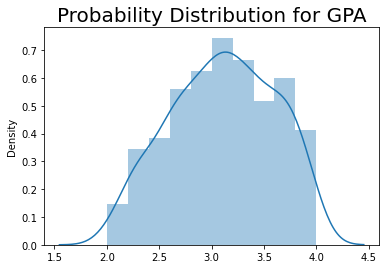

In [25]:
# # Probability Distribution
import seaborn as sns
sns.distplot(GPA).set_title('Probability Distribution for GPA', size='20')
plt.show()

#seems normally distributed

       ACT_COMPOSITE
count     909.000000
mean       22.660066
std         4.301414
min        12.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        34.000000


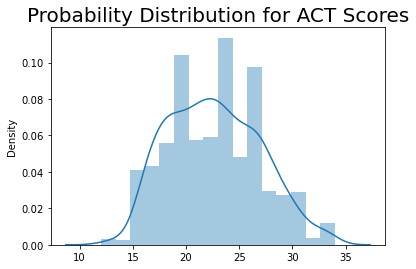

In [26]:
# Probability distribution for ACT_COMPOSITE Scores
ACT_Score = pd.DataFrame(df_grad['ACT_COMPOSITE'])
print(ACT_Score.describe())
sns.distplot(ACT_Score).set_title('Probability Distribution for ACT Scores', size='20')
plt.show()

In [27]:
from collections import defaultdict
id_dict = defaultdict()
for id in df_class['ID'].values:
    id_dict[id] = (0,0) 
for index, row in df_class.iterrows():
    if row.LEVEL == 'UG':
        id_dict[row.ID] = (id_dict[row.ID][0] + 1, id_dict[row.ID][1])
    elif row.LEVEL == 'GR':
        id_dict[row.ID] = (id_dict[row.ID][0], id_dict[row.ID][1] + 1) 

In [28]:
level_ug = []
level_gr = []
for i, values in id_dict.items():
    level_ug.append(values[0])
    level_gr.append(values[1])

In [29]:
graduated = []
for index, row in df_grad.iterrows():
    if str(row['Graduated_In_Major']).strip() == 'Yes':
        graduated.append("Yes")
    else:
        graduated.append("No") 
df_grad["Graduated_In_Major"] = pd.Series(graduated)

In [30]:
'''
from collections import defaultdict
id_dict_grade = defaultdict()
for id in df_class['ID'].values:
    id_dict_grade[id] = (0,0) 
'''

"\nfrom collections import defaultdict\nid_dict_grade = defaultdict()\nfor id in df_class['ID'].values:\n    id_dict_grade[id] = (0,0) \n"

In [31]:
df_joined = df_grad.merge(df_classu, on='ID', how='left')
df_joined_copy = df_joined

In [32]:
df_joined.columns

Index(['Unnamed: 0_x', 'ID', 'IPEDS_Ethnicity_x', 'GENDER_x', 'DEG_1_x',
       'Major_x', 'HS_GPA_x', 'AGE_x', 'Housing_x', 'Greek_Org_x', 'Athlete_x',
       'ACT_ENGLISH_x', 'ACT_MATH_x', 'ACT_READING_x',
       'ACT_SCIENCE_REASONING_x', 'ACT_COMPOSITE_x', 'CITIZENSHIP_DESC_x',
       'First_Term_Major_x', 'Freshman_Major_x', 'Unnamed: 19',
       'Left_Major_Major', 'Degree', 'Degree_Desc', 'Maj1', 'Maj1_Desc',
       'CUM_Instiution_GPA', 'CUM_Institution_GPA_Hours', 'CITIZENSHIP_DESC_y',
       'Gender', 'AGE_y', 'First_Time_Freshman', 'Freshman_Major_y', 'ACT_C',
       'ACT_E', 'ACT_M', 'ACT_R', 'ACT_S', 'SAT_V', 'SAT_M', 'SAT_T', 'SPORT',
       'GREEK', 'Graduated_In_Major', 'Unnamed: 0_y', 'CRN', 'SUBJECT',
       'SUBJECT_D', 'NUMBER', 'Unnamed: 6', 'LEVEL', 'IPEDS_Ethnicity_y',
       'GENDER_y', 'DEG_1_y', 'Major_y', 'HS_GPA_y', 'AGE', 'Housing_y',
       'Greek_Org_y', 'Athlete_y', 'ACT_ENGLISH_y', 'ACT_MATH_y',
       'ACT_READING_y', 'ACT_SCIENCE_REASONING_y', 'ACT_CO

Text(0, 0.5, 'Number of Students')

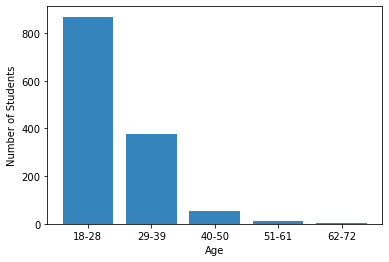

In [33]:
max_age = df_joined['AGE_x'].max(skipna = False)
min_age = df_joined['AGE_x'].min(skipna = False)

age_range = ['18-28', '29-39', '40-50', '51-61', '62-72']
child = df_grad['AGE_x'].between(18, 28, inclusive=True).sum()
millennial = df_grad['AGE_x'].between(29,39, inclusive=True).sum()
generationX = df_grad['AGE_x'].between(40, 50, inclusive=True).sum()
boomer = df_grad['AGE_x'].between(51, 61, inclusive=True).sum()
silent = df_grad['AGE_x'].between(62, 72, inclusive=True).sum()
age_groups = [child, millennial, generationX, boomer, silent]
plt.bar(age_range,  age_groups, alpha=0.9)
plt.xlabel('Age')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of students')

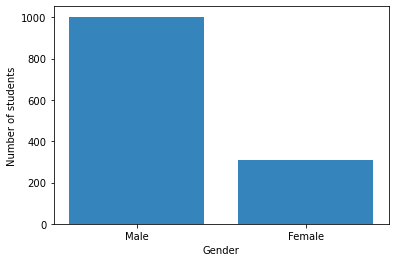

In [34]:
#class
count = df_joined['GENDER_x'].value_counts().index.values
values = df_joined['GENDER_x'].value_counts().to_list()
plt.bar(count, values, alpha=0.9)
names = ['Male', 'Female']
plt.xticks(count, names)
plt.xlabel('Gender')
plt.ylabel('Number of students')

In [35]:
df_joined['GENDER_x'].value_counts()

M    1003
F     308
Name: GENDER_x, dtype: int64

In [36]:
df_joined.head()

,Unnamed: 0_x,ID,IPEDS_Ethnicity_x,GENDER_x,DEG_1_x,Major_x,HS_GPA_x,AGE_x,Housing_x,Greek_Org_x,...,CITIZENSHIP_DESC,First_Term_Major_y,Freshman_Major,Freshman_Major_DESC,Transfer_Major,Transfer_Hours,Transfer_GPA,Transfer_Major_DESC,PR_ZIP,GRADE
0,0,500336,American Indian or Alaskan Native,F,BBA,Computer Information Systems,2.63,32,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,500584,White,M,BBA,Computer Information Systems,NaN,47,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,500589,White,M,BBA,Computer Information Systems,NaN,34,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,500639,White,M,BBA,Computer Information Systems,1.77,34,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,500980,White,F,BBA,Computer Information Systems,NaN,53,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
to_drop_cols = ['Unnamed: 0_x', 'CRN','Unnamed: 0_y', 'IPEDS_Ethnicity_y', 'DEG_1_y', 'Major_y', 'HS_GPA_y', 'AGE', 'Housing_y', 'Greek_Org_y', 
'Athlete_y', 'ACT_ENGLISH_y', 'ACT_MATH_y', 'ACT_READING_y', 'ACT_SCIENCE_REASONING_y', 'ACT_COMPOSITE_y', 'SAT_V', 'SAT_M', 'SAT_T',
'SAT_VERBAL', 'SAT_MATH', 'SAT_TOTAL', 'NAT_OF_CITIZENSHIP_DESC', 'CITIZENSHIP_TYPE', 'CITIZENSHIP_DESC', 'Freshman_Major_x',
'Unnamed: 19', 'Left_Major_Major', 'Degree', 'Degree_Desc', 'Maj1_Desc', 'CITIZENSHIP_DESC_y', 'Gender', 'AGE_y', 'Freshman_Major_y', 
'ACT_C', 'ACT_E', 'ACT_M', 'ACT_R', 'ACT_S', 'SAT_V', 'SAT_M', 'SAT_T', 'SPORT', 'GREEK', 'First_Term_Major_y', 'Freshman_Major', 'Freshman_Major_DESC',
'Transfer_Major_DESC', 'Unnamed: 6', 'SUBJECT_D', 'GENDER_y', 'LEVEL'] 
df_joined = df_joined.drop(to_drop_cols, axis=1)
l = df_joined.columns.tolist()


In [38]:
df_joined.head()

,ID,IPEDS_Ethnicity_x,GENDER_x,DEG_1_x,Major_x,HS_GPA_x,AGE_x,Housing_x,Greek_Org_x,Athlete_x,...,CUM_Institution_GPA_Hours,First_Time_Freshman,Graduated_In_Major,SUBJECT,NUMBER,Transfer_Major,Transfer_Hours,Transfer_GPA,PR_ZIP,GRADE
0,500336,American Indian or Alaskan Native,F,BBA,Computer Information Systems,2.63,32,No,No,No,...,127.0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500584,White,M,BBA,Computer Information Systems,NaN,47,No,No,No,...,89.0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500589,White,M,BBA,Computer Information Systems,NaN,34,No,No,No,...,75.0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500639,White,M,BBA,Computer Information Systems,1.77,34,No,No,No,...,129.0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500980,White,F,BBA,Computer Information Systems,NaN,53,No,No,No,...,119.0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 1310
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1311 non-null   int64  
 1   IPEDS_Ethnicity_x          1311 non-null   object 
 2   GENDER_x                   1311 non-null   object 
 3   DEG_1_x                    1311 non-null   object 
 4   Major_x                    1311 non-null   object 
 5   HS_GPA_x                   828 non-null    float64
 6   AGE_x                      1311 non-null   int64  
 7   Housing_x                  1311 non-null   object 
 8   Greek_Org_x                1311 non-null   object 
 9   Athlete_x                  1311 non-null   object 
 10  ACT_ENGLISH_x              909 non-null    float64
 11  ACT_MATH_x                 909 non-null    float64
 12  ACT_READING_x              909 non-null    float64
 13  ACT_SCIENCE_REASONING_x    909 non-null    float

In [40]:
df_joined.describe()

,ID,HS_GPA_x,AGE_x,ACT_ENGLISH_x,ACT_MATH_x,ACT_READING_x,ACT_SCIENCE_REASONING_x,ACT_COMPOSITE_x,CUM_Instiution_GPA,CUM_Institution_GPA_Hours,Transfer_Hours,Transfer_GPA
count,1311.000000,828.000000,1311.000000,909.000000,909.000000,909.000000,909.000000,909.000000,376.000000,376.000000,407.000000,407.000000
mean,606838.616323,3.094070,27.151793,22.631463,21.332233,23.404840,22.633663,22.660066,3.107559,114.869681,37.949057,2.498510
std,46637.215787,0.683015,6.569232,5.497851,4.322320,5.643504,4.256766,4.301414,0.493310,29.273178,31.747767,1.132344
min,500336.000000,0.000000,18.000000,9.000000,13.000000,10.000000,10.000000,12.000000,2.000000,48.000000,0.000000,0.000000
25%,574125.000000,2.627500,23.000000,19.000000,18.000000,19.000000,20.000000,19.000000,2.747000,91.000000,9.000000,2.000000
50%,604433.000000,3.150000,26.000000,22.000000,21.000000,23.000000,22.000000,22.000000,3.115000,120.000000,30.000000,2.693900
75%,641402.000000,3.662500,30.000000,26.000000,25.000000,27.000000,25.000000,26.000000,3.491750,132.000000,60.500000,3.278900
max,706129.000000,4.000000,69.000000,36.000000,36.000000,36.000000,36.000000,34.000000,4.000000,219.000000,184.000000,4.000000


In [41]:
df_joined.isnull().sum()

ID                              0
IPEDS_Ethnicity_x               0
GENDER_x                        0
DEG_1_x                         0
Major_x                         0
HS_GPA_x                      483
AGE_x                           0
Housing_x                       0
Greek_Org_x                     0
Athlete_x                       0
ACT_ENGLISH_x                 402
ACT_MATH_x                    402
ACT_READING_x                 402
ACT_SCIENCE_REASONING_x       402
ACT_COMPOSITE_x               402
CITIZENSHIP_DESC_x              0
First_Term_Major_x              0
Maj1                          935
CUM_Instiution_GPA            935
CUM_Institution_GPA_Hours     935
First_Time_Freshman           935
Graduated_In_Major              0
SUBJECT                       604
NUMBER                        604
Transfer_Major               1009
Transfer_Hours                904
Transfer_GPA                  904
PR_ZIP                        631
GRADE                         665
dtype: int64

In [42]:
remove_cols = ['HS_GPA_x','ACT_ENGLISH_x','ACT_MATH_x','ACT_READING_x','ACT_SCIENCE_REASONING_x','ACT_COMPOSITE_x','Maj1', 'CUM_Instiution_GPA','CUM_Institution_GPA_Hours','First_Time_Freshman','Graduated_In_Major','SUBJECT', 'NUMBER','Transfer_Major','Transfer_Hours', 'Transfer_GPA','PR_ZIP','GRADE']
k = df_joined.drop(remove_cols, axis=1)

In [43]:
k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 1310
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  1311 non-null   int64 
 1   IPEDS_Ethnicity_x   1311 non-null   object
 2   GENDER_x            1311 non-null   object
 3   DEG_1_x             1311 non-null   object
 4   Major_x             1311 non-null   object
 5   AGE_x               1311 non-null   int64 
 6   Housing_x           1311 non-null   object
 7   Greek_Org_x         1311 non-null   object
 8   Athlete_x           1311 non-null   object
 9   CITIZENSHIP_DESC_x  1311 non-null   object
 10  First_Term_Major_x  1311 non-null   object
dtypes: int64(2), object(9)
memory usage: 122.9+ KB


In [44]:
k.isnull().sum()

ID                    0
IPEDS_Ethnicity_x     0
GENDER_x              0
DEG_1_x               0
Major_x               0
AGE_x                 0
Housing_x             0
Greek_Org_x           0
Athlete_x             0
CITIZENSHIP_DESC_x    0
First_Term_Major_x    0
dtype: int64

In [45]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in k.columns.values:
    if k[col].dtypes=='object':
        k[col]=le.fit_transform(k[col])

In [46]:
import pandas as pd
from sklearn.cluster import KMeans
#train kmeans
kmeans = KMeans(n_clusters = 6, random_state = 0)
kmeans.fit(k)
print("Clustersize: \n")
#print(kmeans.labels_)
print(pd.Series(kmeans.labels_).value_counts())

#store cluster labels in df
df_joined["cluster"] = kmeans.labels_

Clustersize: 

5    303
3    278
1    256
0    212
2    188
4     74
dtype: int64


In [47]:
clean_df = df_joined[["cluster", "HS_GPA_x"]].dropna()
clean_df

,cluster,HS_GPA_x
0,4,2.63
3,4,1.77
5,4,4.00
6,4,2.93
7,4,2.69
...,...,...
1300,2,2.86
1302,2,3.53
1306,2,3.62
1308,2,3.65


In [51]:
#for columns with missing values, drop missing values and find median or most common value - per cluster
Values_replace_missing = pd.DataFrame()
for i in remove_cols:
    clean_df = df_joined[["cluster", i]].dropna()
    if df_joined[i].dtypes == 'object':
        Values_replace_missing[i] = clean_df.groupby(["cluster"]).agg(lambda x:x.value_counts().index.values[0])
    else:
        Values_replace_missing[i] = clean_df.groupby(["cluster"]).median() 

In [52]:
#replace missing values with median or most common value in the same cluster
for cl, cat in ((x, y) for x in range(6) for y in remove_cols):
    df_joined.loc[(df_joined["cluster"] == cl) & pd.isnull(df_joined[cat]), cat] = Values_replace_missing.loc[cl, cat]

#print remaining missing values (should be zero)
print("\n remaining missing values: " + str(df_joined.isnull().sum().sum()))


 remaining missing values: 0


In [53]:
df_joined.isnull().sum()

ID                           0
IPEDS_Ethnicity_x            0
GENDER_x                     0
DEG_1_x                      0
Major_x                      0
HS_GPA_x                     0
AGE_x                        0
Housing_x                    0
Greek_Org_x                  0
Athlete_x                    0
ACT_ENGLISH_x                0
ACT_MATH_x                   0
ACT_READING_x                0
ACT_SCIENCE_REASONING_x      0
ACT_COMPOSITE_x              0
CITIZENSHIP_DESC_x           0
First_Term_Major_x           0
Maj1                         0
CUM_Instiution_GPA           0
CUM_Institution_GPA_Hours    0
First_Time_Freshman          0
Graduated_In_Major           0
SUBJECT                      0
NUMBER                       0
Transfer_Major               0
Transfer_Hours               0
Transfer_GPA                 0
PR_ZIP                       0
GRADE                        0
cluster                      0
dtype: int64

In [54]:
df_joined['cluster'].value_counts()

5    303
3    278
1    256
0    212
2    188
4     74
Name: cluster, dtype: int64

In [55]:
le=LabelEncoder()
df_joined = df_joined.apply(le.fit_transform)
df_joined.head()

,ID,IPEDS_Ethnicity_x,GENDER_x,DEG_1_x,Major_x,HS_GPA_x,AGE_x,Housing_x,Greek_Org_x,Athlete_x,...,First_Time_Freshman,Graduated_In_Major,SUBJECT,NUMBER,Transfer_Major,Transfer_Hours,Transfer_GPA,PR_ZIP,GRADE,cluster
0,0,0,0,1,1,77,14,0,0,0,...,1,1,5,9,3,35,43,276,1,4
1,3,7,1,1,1,82,29,0,0,0,...,0,1,5,9,3,35,43,276,1,4
2,4,7,1,1,1,82,16,0,0,0,...,0,1,5,9,3,35,43,276,1,4
3,5,7,1,1,1,14,16,0,0,0,...,0,1,5,9,3,35,43,276,1,4
4,7,7,0,1,1,82,35,0,0,0,...,0,1,5,9,3,35,43,276,1,4


In [58]:
needed_columns= ['ID','IPEDS_Ethnicity_x', 'GENDER_x', 'DEG_1_x', 'Major_x', 'HS_GPA_x',
       'AGE_x', 'Housing_x', 'Greek_Org_x', 'Athlete_x', 'ACT_ENGLISH_x',
       'ACT_MATH_x', 'ACT_READING_x', 'ACT_SCIENCE_REASONING_x',
       'ACT_COMPOSITE_x', 'CITIZENSHIP_DESC_x', 'First_Term_Major_x', 'Maj1',
       'CUM_Instiution_GPA', 'CUM_Institution_GPA_Hours',
       'First_Time_Freshman', 'SUBJECT', 'NUMBER',
       'Transfer_Major', 'Transfer_Hours', 'Transfer_GPA', 'PR_ZIP', 'GRADE']
X = df_joined[needed_columns]
y = df_joined['Graduated_In_Major']
df_new_data = X
df_new_data['Graduated_In_Major'] = y

In [59]:
df_new_data.isnull().sum()

ID                           0
IPEDS_Ethnicity_x            0
GENDER_x                     0
DEG_1_x                      0
Major_x                      0
HS_GPA_x                     0
AGE_x                        0
Housing_x                    0
Greek_Org_x                  0
Athlete_x                    0
ACT_ENGLISH_x                0
ACT_MATH_x                   0
ACT_READING_x                0
ACT_SCIENCE_REASONING_x      0
ACT_COMPOSITE_x              0
CITIZENSHIP_DESC_x           0
First_Term_Major_x           0
Maj1                         0
CUM_Instiution_GPA           0
CUM_Institution_GPA_Hours    0
First_Time_Freshman          0
SUBJECT                      0
NUMBER                       0
Transfer_Major               0
Transfer_Hours               0
Transfer_GPA                 0
PR_ZIP                       0
GRADE                        0
Graduated_In_Major           0
dtype: int64

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'IPEDS_Ethnicity_x'}>,
        <AxesSubplot:title={'center':'GENDER_x'}>,
        <AxesSubplot:title={'center':'DEG_1_x'}>,
        <AxesSubplot:title={'center':'Major_x'}>],
       [<AxesSubplot:title={'center':'HS_GPA_x'}>,
        <AxesSubplot:title={'center':'AGE_x'}>,
        <AxesSubplot:title={'center':'Housing_x'}>,
        <AxesSubplot:title={'center':'Greek_Org_x'}>,
        <AxesSubplot:title={'center':'Athlete_x'}>],
       [<AxesSubplot:title={'center':'ACT_ENGLISH_x'}>,
        <AxesSubplot:title={'center':'ACT_MATH_x'}>,
        <AxesSubplot:title={'center':'ACT_READING_x'}>,
        <AxesSubplot:title={'center':'ACT_SCIENCE_REASONING_x'}>,
        <AxesSubplot:title={'center':'ACT_COMPOSITE_x'}>],
       [<AxesSubplot:title={'center':'CITIZENSHIP_DESC_x'}>,
        <AxesSubplot:title={'center':'First_Term_Major_x'}>,
        <AxesSubplot:title={'center':'Maj1'}>,
        <AxesSubplot:title

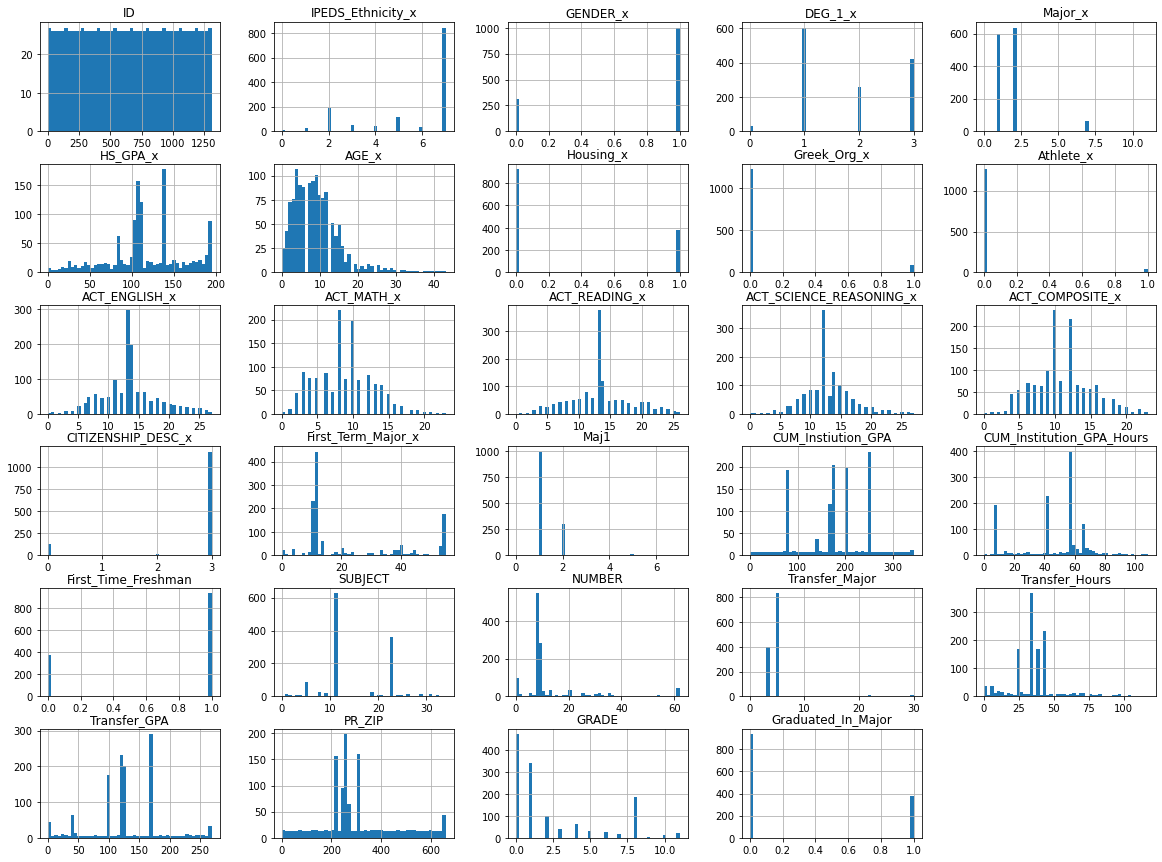

In [60]:
df_new_data.hist(bins=50, figsize=(20,15))

In [62]:
df_new_data.columns

Index(['ID', 'IPEDS_Ethnicity_x', 'GENDER_x', 'DEG_1_x', 'Major_x', 'HS_GPA_x',
       'AGE_x', 'Housing_x', 'Greek_Org_x', 'Athlete_x', 'ACT_ENGLISH_x',
       'ACT_MATH_x', 'ACT_READING_x', 'ACT_SCIENCE_REASONING_x',
       'ACT_COMPOSITE_x', 'CITIZENSHIP_DESC_x', 'First_Term_Major_x', 'Maj1',
       'CUM_Instiution_GPA', 'CUM_Institution_GPA_Hours',
       'First_Time_Freshman', 'SUBJECT', 'NUMBER', 'Transfer_Major',
       'Transfer_Hours', 'Transfer_GPA', 'PR_ZIP', 'GRADE',
       'Graduated_In_Major'],
      dtype='object')

In [63]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
pca = PCA(n_components=5)
principle_components = pca.fit_transform(x_scaled)

df_new_data = pd.DataFrame(principle_components)
df_new_data['Graduated_In_Major'] = y

# One class SVM

In [64]:
# get dataframe containing only yes labels
df_only_yes = df_new_data[df_new_data['Graduated_In_Major']==1]
df_only_yes

,0,1,2,3,4,Graduated_In_Major
0,-0.792946,0.009948,1.179455,-0.114770,0.367399,1
1,-0.755976,0.954319,-0.016058,-0.207880,0.133625,1
2,-0.649498,1.070080,0.058402,-0.424992,0.122150,1
3,-0.791194,0.872033,0.139607,-0.325093,0.186910,1
4,-0.736455,0.763242,0.950044,0.295130,-0.088780,1
...,...,...,...,...,...,...
1007,0.028925,1.071707,-0.148947,-0.096943,-0.020260,1
1010,-0.060015,1.059100,-0.082470,-0.131259,-0.062318,1
1040,-0.514001,0.212208,-0.396822,0.676370,0.190287,1
1044,-0.256826,1.033902,-0.048314,-0.155779,0.018756,1


In [67]:
from collections import defaultdict
X = df_only_yes.loc[:, df_new_data.columns!='Graduated_In_Major']
y = df_only_yes['Graduated_In_Major']
index_list = {}
index_yes = X.index.values
for i in range(len(df_joined)):
    index_list[i] = 0

In [72]:
from sklearn.svm import OneClassSVM
one_svm = OneClassSVM(gamma='auto', nu=0.001).fit(X)
predictions_one_class = one_svm.predict(X)
predictions_final_yes = []
for i in predictions_one_class:
    if i == 1:
        predictions_final_yes.append(i)
    else:
        predictions_final_yes.append(0)
y_values = y.values
for i in index_yes:
    index_list[i] = 1
df_joined_copy["yes_no_label"] = index_list.values()
df_joined["yes_no_label"] = index_list.values()
accuracy_score(predictions_final_yes, y)

0.9893617021276596

In [73]:
df_only_no = df_new_data[df_new_data['Graduated_In_Major']==0]
X_no = df_only_no.loc[:, df_only_no.columns!='Graduated_In_Major']
y_no = df_only_no['Graduated_In_Major']

In [76]:
# predicting no. of students that can be predicted from O label
predictions_no = one_svm.predict(X_no)
prediction_final_no = []
for i in predictions_no:
    if i == -1:
        prediction_final_no.append(0)
    else:
        prediction_final_no.append(1)
df_only_yes["yes_or_no_pred"] = df_only_yes['Graduated_In_Major']
df_only_no["yes_or_no_pred"] = prediction_final_no

In [77]:
frames = [df_only_yes, df_only_no]
result = pd.concat(frames)

In [80]:
print(Counter(result['yes_or_no_pred'].values))
result = result.drop(['Graduated_In_Major'], axis=1)
# total one (graduated): 376 + 43, 0 (not graduated): 892

Counter({0: 892, 1: 419})


In [82]:
trainall, test = train_test_split(result, test_size=0.2, random_state=42, stratify=result['yes_or_no_pred'])
train, val = train_test_split(trainall, test_size=0.2, random_state=42, stratify=trainall['yes_or_no_pred'])

In [83]:
X = train.loc[:, train.columns!='yes_or_no_pred']
y = train['yes_or_no_pred']

In [92]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
pred = clf.predict(X)
X_test = test.loc[:, test.columns!='yes_or_no_pred']
y_test = test['yes_or_no_pred']
pred_test = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_test)

0.973384030418251

In [93]:
class CustomDataset(Dataset):
    def __init__(self,df,transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        x=torch.tensor(self.df.iloc[index, :-1].to_numpy()).float()
        y_label = torch.tensor(self.df.iloc[index, -1])        

        return (x.reshape(len(x),1, 1), y_label)

In [94]:
from torch.utils.data.dataset import Subset
from torch.utils.data import Dataset, DataLoader

train_dataset = CustomDataset(train)
train_dataloader = DataLoader(dataset=train_dataset, batch_size=32,shuffle=True)

val_dataset = CustomDataset(val)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=32,shuffle=True)

test_dataset = CustomDataset(test)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=32,shuffle=True)

In [99]:
DIM = 14

In [100]:
class Discriminator(nn.Module):
    def __init__(self, bias=True):
        super(Discriminator, self).__init__()

        self.input = nn.Sequential (
            nn.ConvTranspose2d(in_channels=5, out_channels=DIM*32, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(DIM*32),
            nn.ReLU(inplace=True))
        
        self.l1 = nn.Sequential (
            nn.ConvTranspose2d(in_channels=DIM*32, out_channels=DIM*16, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(DIM*16),
            nn.ReLU(inplace=True))
        
        self.l2 = nn.Sequential (
            nn.ConvTranspose2d(in_channels=DIM*16, out_channels=DIM*8, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(DIM*8),
            nn.ReLU(inplace=True))
        
        self.l3 = nn.Sequential (
            nn.Conv2d(in_channels=DIM*8, out_channels=DIM*4, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(DIM*4),
            nn.ReLU(inplace=True))
        
        self.l4 = nn.Sequential (
            nn.Conv2d(in_channels=DIM*4, out_channels=DIM*2, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(DIM*2),
            nn.ReLU(inplace=True))
        
        self.l5 = nn.Sequential (
            nn.Conv2d(in_channels=DIM*2, out_channels=1, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Sigmoid())
        
        
    def forward(self, x):
        x = self.input(x)
        x = self.l1(x)
        x = self.l2(x)
        x = self.l3(x)
        x = self.l4(x)
        out = self.l5(x)
        return out

In [101]:
dataIter = iter(train_dataloader)
x, labels = dataIter.next()
print(x[0].shape)
print(labels[0])

torch.Size([5, 1, 1])
tensor(1)


In [102]:
from torch.nn import functional as F
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
model = Discriminator()
print(model)
optimizer = optim.SGD(model.parameters(), lr=0.1)

Using cpu device
Discriminator(
  (input): Sequential(
    (0): ConvTranspose2d(5, 448, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(448, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (l1): Sequential(
    (0): ConvTranspose2d(448, 224, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(224, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (l2): Sequential(
    (0): ConvTranspose2d(224, 112, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(112, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (l3): Sequential(
    (0): Conv2d(112, 56, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(56, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (l4): Sequential

In [103]:
class EarlyStopping():
    def __init__(self, tolerance=5, min_delta=0):

        self.tolerance = tolerance
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False

    def __call__(self, train_loss, validation_loss):
        if (validation_loss-train_loss) > self.min_delta:
            self.counter +=1
            if self.counter >= self.tolerance:  
                self.early_stop = True

In [105]:
early_stopping=EarlyStopping(30)

In [106]:
all_train_loss = []
all_val_loss = []
# specify loss function (binary cross-entropy)
criterion = nn.BCELoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)
for e in range(1000):
    train_loss = 0.0
    valid_loss = 0.0
    
    model.train()
    
    for data, target in train_dataloader:
        data, target = data, target.to(torch.float32)
        optimizer.zero_grad()
        prob_real = model(data)
        loss = criterion(prob_real.view(-1), target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()* data.size(0)
    model.eval()
    for data, target in val_dataloader:
        data, target = data, target.to(torch.float32)
        prob_real = model(data)
        loss = criterion(prob_real.view(-1), target)
        valid_loss += loss.item()* data.size(0)
        
    train_loss = train_loss/len(train_dataloader.dataset)
    valid_loss = valid_loss/len(val_dataloader.dataset)
    all_train_loss.append(train_loss)
    all_val_loss.append(valid_loss)
    early_stopping(train_loss, valid_loss)
    if early_stopping.early_stop:
       print("We are at epoch:", e)
       break
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            e, train_loss, valid_loss)) 

Epoch: 0 	Training Loss: 0.439023 	Validation Loss: 0.685735
Epoch: 1 	Training Loss: 0.270447 	Validation Loss: 0.647401
Epoch: 2 	Training Loss: 0.220466 	Validation Loss: 0.392012
Epoch: 3 	Training Loss: 0.191396 	Validation Loss: 0.179283
Epoch: 4 	Training Loss: 0.171341 	Validation Loss: 0.141902
Epoch: 5 	Training Loss: 0.154447 	Validation Loss: 0.132250
Epoch: 6 	Training Loss: 0.141574 	Validation Loss: 0.121227
Epoch: 7 	Training Loss: 0.134838 	Validation Loss: 0.111660
Epoch: 8 	Training Loss: 0.125674 	Validation Loss: 0.107202
Epoch: 9 	Training Loss: 0.117089 	Validation Loss: 0.094838
Epoch: 10 	Training Loss: 0.112638 	Validation Loss: 0.091485
Epoch: 11 	Training Loss: 0.106274 	Validation Loss: 0.088488
Epoch: 12 	Training Loss: 0.102520 	Validation Loss: 0.082281
Epoch: 13 	Training Loss: 0.098839 	Validation Loss: 0.078087
Epoch: 14 	Training Loss: 0.091972 	Validation Loss: 0.076301
Epoch: 15 	Training Loss: 0.092735 	Validation Loss: 0.072577
Epoch: 16 	Trainin

In [107]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

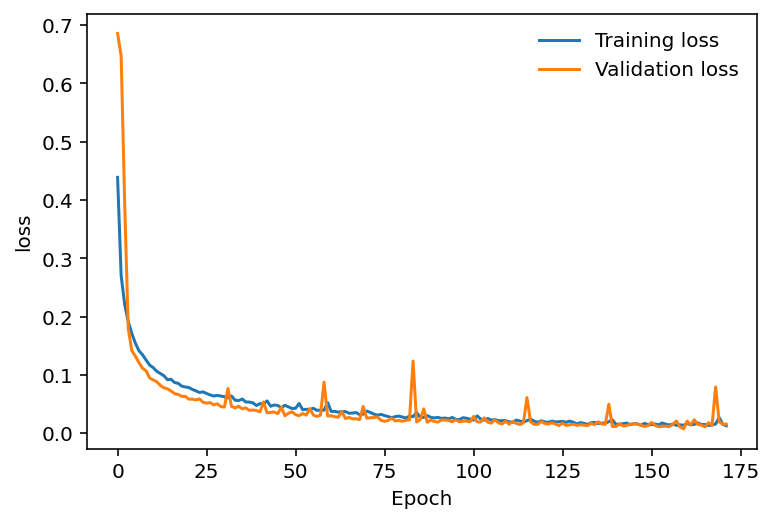

In [108]:
plt.plot(all_train_loss, label='Training loss')
plt.plot(all_val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(frameon=False)

In [109]:
train_accuracy = 1 - np.array(all_train_loss)
validation_accuracy = 1 - np.array(all_val_loss)

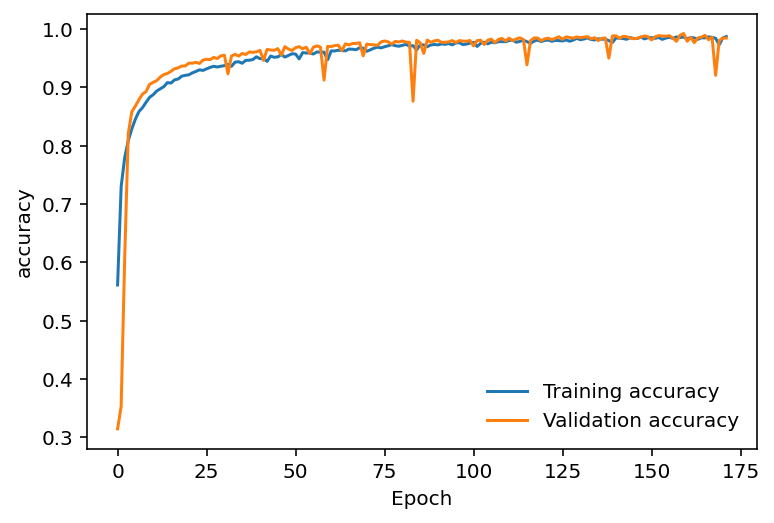

In [110]:
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(validation_accuracy, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(frameon=False)

In [111]:
from collections import Counter
prob_model_pred = []
target_pred = []
for data, target in train_dataloader:
        data, target = data, target.to(torch.float32)
        prob_real = model(data).view(-1)
        prob_model_pred.extend(prob_real)
        target_pred.extend(target)
        loss = criterion(prob_real.view(-1), target)
        train_loss += loss.item()* data.size(0)
print("Train loss is ", train_loss/len(train_dataloader.dataset))
prob_pred_train = [i.item() for i in prob_model_pred]
target_pred_train = [int(i.item()) for i in target_pred]
final_prob_train = []
for i in prob_pred_train:
    if i > 0.50:
        final_prob_train.append(1)
    else:
        final_prob_train.append(0)
print(Counter(final_prob_train))
print(Counter(target_pred_train))

Train loss is  0.012089305852333814
Counter({0: 570, 1: 268})
Counter({0: 570, 1: 268})


Accuracy: 0.99761
Error rate:0.00239
f1-score: 0.99627


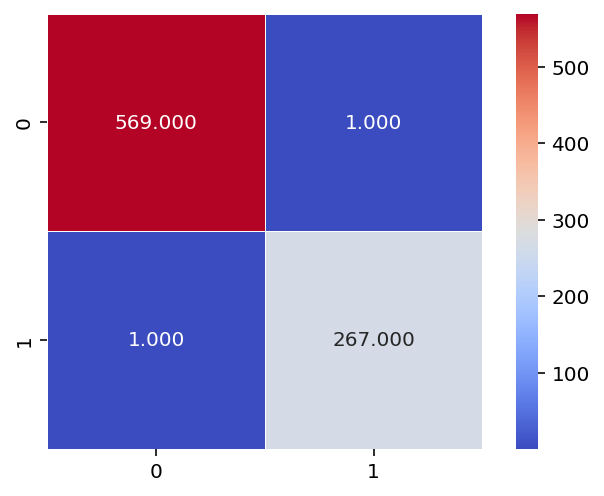

In [162]:
confusion_matrix = metrics.confusion_matrix(final_prob_train, target_pred_train)
#print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = plt.cm.coolwarm)
print(f"Accuracy: { accuracy_score(final_prob_train, target_pred_train):.5f}")
print(f"Error rate:{ 1 - accuracy_score(final_prob_train, target_pred_train):.5f}")
print(f"f1-score: { metrics.f1_score(final_prob_train, target_pred_train):.5f}")

In [113]:
prob_model_pred = []
target_pred = []
val_loss = 0
for data, target in val_dataloader:
        data, target = data, target.to(torch.float32)
        prob_real = model(data).view(-1)
        prob_model_pred.extend(prob_real)
        target_pred.extend(target)
        loss = criterion(prob_real.view(-1), target)
        val_loss += loss.item()* data.size(0)
print("Val loss is ", val_loss/len(val_dataloader.dataset))
prob_pred_val = [i.item() for i in prob_model_pred]
target_pred_val = [int(i.item()) for i in target_pred]
final_prob_val = []
for i in prob_pred_val:
    if i > 0.50:
        final_prob_val.append(1)
    else:
        final_prob_val.append(0)
print(Counter(final_prob_val))
print(Counter(target_pred_val))

Val loss is  0.015584244614555723
Counter({0: 142, 1: 68})
Counter({0: 143, 1: 67})


Accuracy: 0.99524
Error rate:0.00476
f1-score: 0.99259


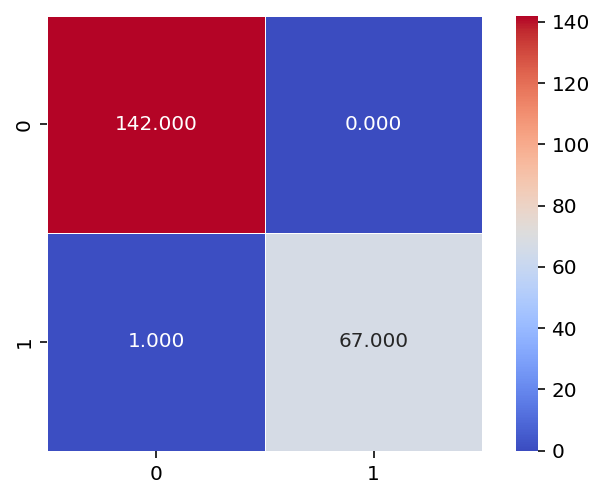

In [163]:
confusion_matrix = metrics.confusion_matrix(final_prob_val, target_pred_val)
#print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = plt.cm.coolwarm)
print(f"Accuracy: { accuracy_score(final_prob_val, target_pred_val):.5f}")
print(f"Error rate:{ 1 - accuracy_score(final_prob_val, target_pred_val):.5f}")
print(f"f1-score: { metrics.f1_score(final_prob_val, target_pred_val):.5f}")

In [115]:
prob_model_pred = []
target_pred = []
test_loss = 0
for data, target in test_dataloader:
        data, target = data, target.to(torch.float32)
        prob_real = model(data).view(-1)
        prob_model_pred.extend(prob_real)
        target_pred.extend(target)
        loss = criterion(prob_real.view(-1), target)
        test_loss += loss.item()* data.size(0)
print("Test loss is ", test_loss/len(test_dataloader.dataset))
prob_pred_test = [i.item() for i in prob_model_pred]
target_pred_test = [int(i.item()) for i in target_pred]
final_prob_test = []
for i in prob_pred_test:
    if i > 0.50:
        final_prob_test.append(1)
    else:
        final_prob_test.append(0)
print(Counter(final_prob_test))
print(Counter(target_pred_test))

Test loss is  0.07852563207097947
Counter({0: 176, 1: 87})
Counter({0: 179, 1: 84})


Accuracy: 0.96578
Error rate:0.03422
f1-score: 0.94737


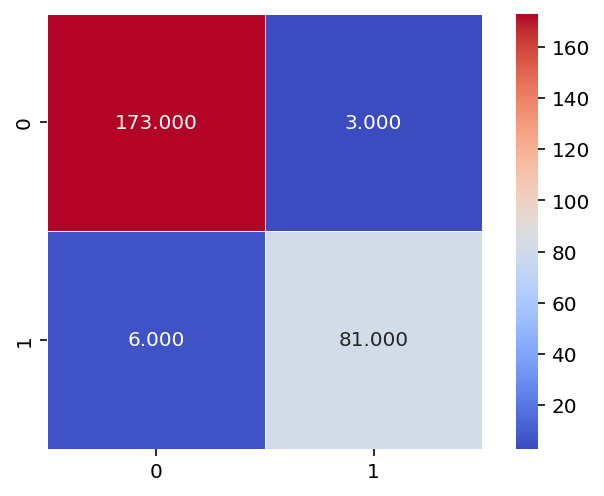

In [164]:
confusion_matrix = metrics.confusion_matrix(final_prob_test, target_pred_test)
#print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = plt.cm.coolwarm)
print(f"Accuracy: { accuracy_score(final_prob_test, target_pred_test):.5f}")
print(f"Error rate:{ 1 - accuracy_score(final_prob_test, target_pred_test):.5f}")
print(f"f1-score: { metrics.f1_score(final_prob_test, target_pred_test):.5f}")

# Interpretation of results

## Insights from True Label

In [117]:
df_joined_cp = df_joined_copy.drop(columns = ['Unnamed: 0_x'])

In [118]:
df_joined_cp.head()

,ID,IPEDS_Ethnicity_x,GENDER_x,DEG_1_x,Major_x,HS_GPA_x,AGE_x,Housing_x,Greek_Org_x,Athlete_x,...,First_Term_Major_y,Freshman_Major,Freshman_Major_DESC,Transfer_Major,Transfer_Hours,Transfer_GPA,Transfer_Major_DESC,PR_ZIP,GRADE,yes_no_label
0,500336,American Indian or Alaskan Native,F,BBA,Computer Information Systems,2.63,32,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,500584,White,M,BBA,Computer Information Systems,NaN,47,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,500589,White,M,BBA,Computer Information Systems,NaN,34,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,500639,White,M,BBA,Computer Information Systems,1.77,34,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,500980,White,F,BBA,Computer Information Systems,NaN,53,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [120]:
df_yes = df_joined_cp[df_joined_cp['yes_no_label']==1]
df_no = df_joined_cp[df_joined_cp['yes_no_label']==0]

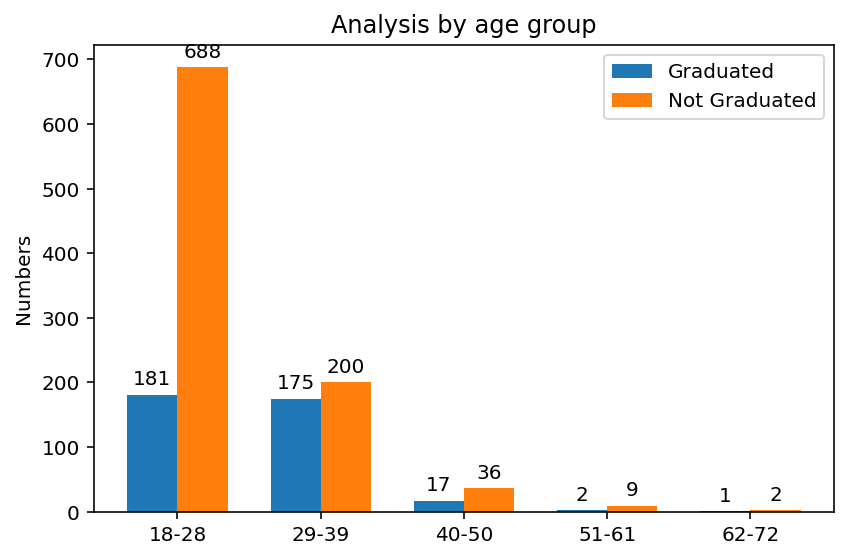

In [194]:
import warnings
warnings.filterwarnings('ignore')

age_range = ['18-28', '29-39', '40-50', '51-61', '62-72']
x = np.arange(len(age_groups))
width = 0.35
child_yes = df_yes['AGE_x'].between(18, 28, inclusive=True).sum()
millennial_yes = df_yes['AGE_x'].between(29,39, inclusive=True).sum()
generationX_yes = df_yes['AGE_x'].between(40, 50, inclusive=True).sum()
boomer_yes = df_yes['AGE_x'].between(51, 61, inclusive=True).sum()
silent_yes = df_yes['AGE_x'].between(62, 72, inclusive=True).sum()

child_no = df_no['AGE_x'].between(18, 28, inclusive=True).sum()
millennial_no = df_no['AGE_x'].between(29,39, inclusive=True).sum()
generationX_no = df_no['AGE_x'].between(40, 50, inclusive=True).sum()
boomer_no = df_no['AGE_x'].between(51, 61, inclusive=True).sum()
silent_no = df_no['AGE_x'].between(62, 72, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, boomer_yes, silent_yes]
non_graduated_groups = [child_no, millennial_no, generationX_no, boomer_no, silent_no]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

ax.set_ylabel('Numbers')
ax.set_title('Analysis by age group')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [124]:
X_train = df_joined_cp.loc[:, df_joined_cp.columns!='yes_no_label']
y = df_joined_cp['yes_no_label']

In [125]:
act_english = df_joined_cp['ACT_ENGLISH_x'].to_list()
act_eng = []
for i in act_english:
    if i > 0:
        act_eng.append(i)

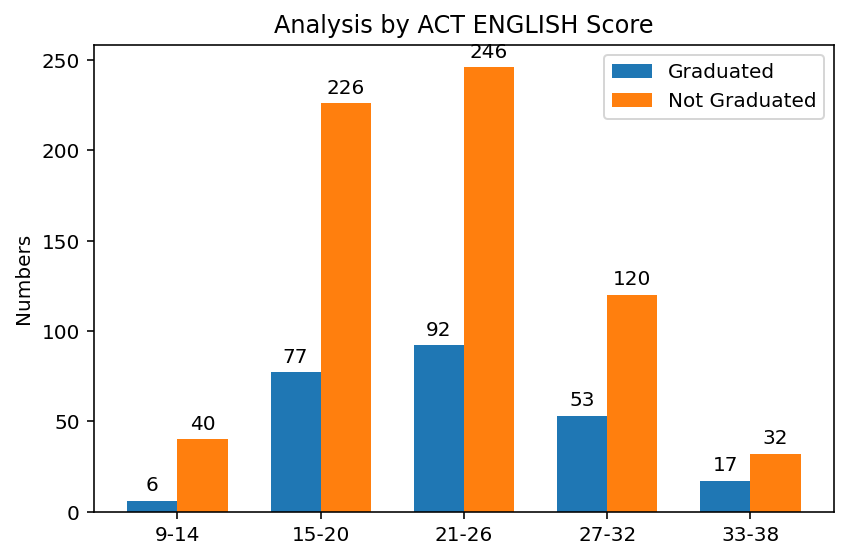

In [195]:
age_range = ['9-14', '15-20', '21-26', '27-32', '33-38']
x = np.arange(len(age_range))
width = 0.35
child_yes = df_yes['ACT_ENGLISH_x'].between(9, 14, inclusive=True).sum()
millennial_yes = df_yes['ACT_ENGLISH_x'].between(15,20, inclusive=True).sum()
generationX_yes = df_yes['ACT_ENGLISH_x'].between(21, 26, inclusive=True).sum()
generationX1_y = df_yes['ACT_ENGLISH_x'].between(27, 32, inclusive=True).sum()
generationX2_y = df_yes['ACT_ENGLISH_x'].between(33, 38, inclusive=True).sum()

child_no = df_no['ACT_ENGLISH_x'].between(9, 14, inclusive=True).sum()
millennial_no = df_no['ACT_ENGLISH_x'].between(15,20, inclusive=True).sum()
generationX_no = df_no['ACT_ENGLISH_x'].between(21, 26, inclusive=True).sum()
generationX1_n = df_no['ACT_ENGLISH_x'].between(27, 32, inclusive=True).sum()
generationX2_n = df_no['ACT_ENGLISH_x'].between(33, 38, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, generationX1_y, generationX2_y]
non_graduated_groups = [child_no, millennial_no, generationX_no, generationX1_n, generationX2_n]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

ax.set_ylabel('Numbers')
ax.set_title('Analysis by ACT ENGLISH Score')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [127]:
act_mathematics = df_joined_cp['ACT_MATH_x'].to_list()
act_math = []
for i in act_mathematics:
    if i > 0:
        act_math.append(i)
print(min(act_math))
print(max(act_math))

13.0
36.0


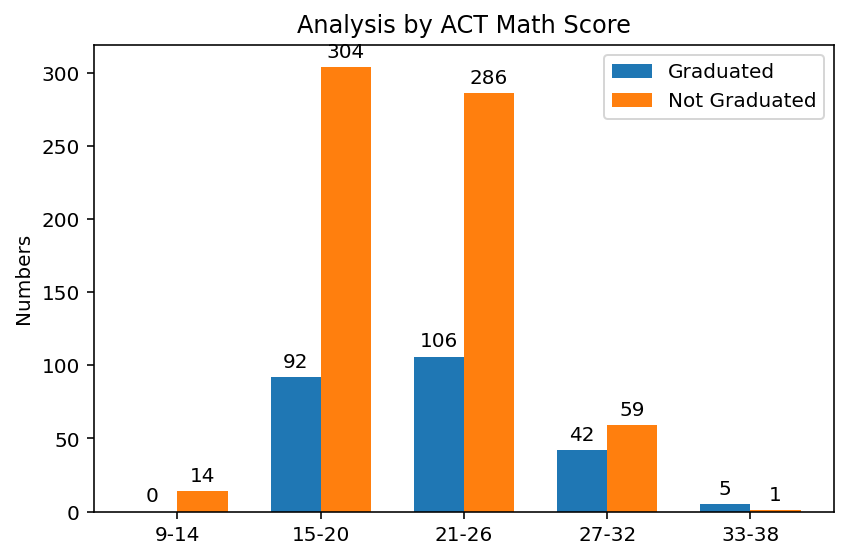

In [196]:
age_range = ['9-14', '15-20', '21-26', '27-32', '33-38']
x = np.arange(len(age_range))
width = 0.35
child_yes = df_yes['ACT_MATH_x'].between(9, 14, inclusive=True).sum()
millennial_yes = df_yes['ACT_MATH_x'].between(15,20, inclusive=True).sum()
generationX_yes = df_yes['ACT_MATH_x'].between(21, 26, inclusive=True).sum()
generationX1_y = df_yes['ACT_MATH_x'].between(27, 32, inclusive=True).sum()
generationX2_y = df_yes['ACT_MATH_x'].between(33, 38, inclusive=True).sum()

child_no = df_no['ACT_MATH_x'].between(9, 14, inclusive=True).sum()
millennial_no = df_no['ACT_MATH_x'].between(15,20, inclusive=True).sum()
generationX_no = df_no['ACT_MATH_x'].between(21, 26, inclusive=True).sum()
generationX1_n = df_no['ACT_MATH_x'].between(27, 32, inclusive=True).sum()
generationX2_n = df_no['ACT_MATH_x'].between(33, 38, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, generationX1_y, generationX2_y]
non_graduated_groups = [child_no, millennial_no, generationX_no, generationX1_n, generationX2_n]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Numbers')
ax.set_title('Analysis by ACT Math Score')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [130]:
act_reading = df_joined_cp['ACT_READING_x'].to_list()
act_read = []
for i in act_reading:
    if i > 0:
        act_read.append(i)
print(min(act_read))
print(max(act_read))

10.0
36.0


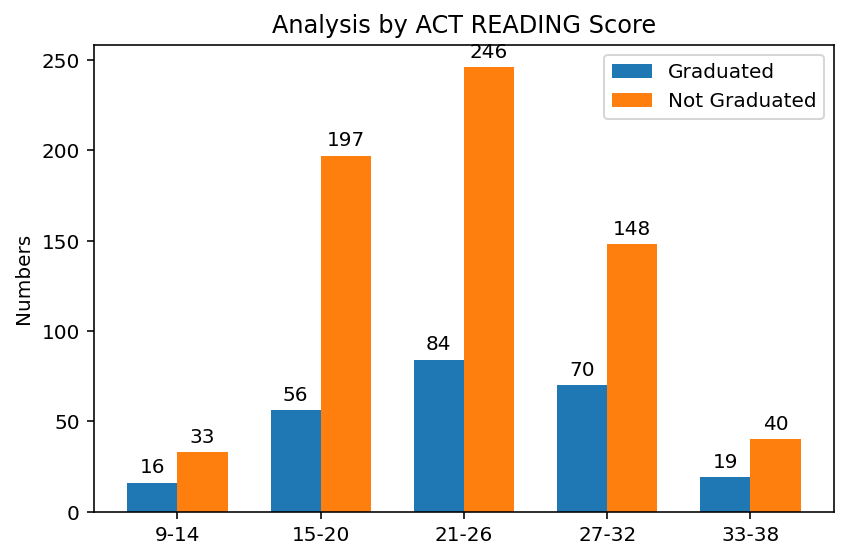

In [197]:
import warnings
warnings.filterwarnings('ignore')

age_range = ['9-14', '15-20', '21-26', '27-32', '33-38']
x = np.arange(len(age_range))
width = 0.35
child_yes = df_yes['ACT_READING_x'].between(9, 14, inclusive=True).sum()
millennial_yes = df_yes['ACT_READING_x'].between(15,20, inclusive=True).sum()
generationX_yes = df_yes['ACT_READING_x'].between(21, 26, inclusive=True).sum()
generationX1_y = df_yes['ACT_READING_x'].between(27, 32, inclusive=True).sum()
generationX2_y = df_yes['ACT_READING_x'].between(33, 38, inclusive=True).sum()

child_no = df_no['ACT_READING_x'].between(9, 14, inclusive=True).sum()
millennial_no = df_no['ACT_READING_x'].between(15,20, inclusive=True).sum()
generationX_no = df_no['ACT_READING_x'].between(21, 26, inclusive=True).sum()
generationX1_n = df_no['ACT_READING_x'].between(27, 32, inclusive=True).sum()
generationX2_n = df_no['ACT_READING_x'].between(33, 38, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, generationX1_y, generationX2_y]
non_graduated_groups = [child_no, millennial_no, generationX_no, generationX1_n, generationX2_n]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

ax.set_ylabel('Numbers')
ax.set_title('Analysis by ACT READING Score')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [133]:
act_reasoning = df_joined_cp['ACT_SCIENCE_REASONING_x'].to_list()
act_reason = []
for i in act_reasoning:
    if i > 0:
        act_reason.append(i)
print(min(act_reason))
print(max(act_reason))

10.0
36.0


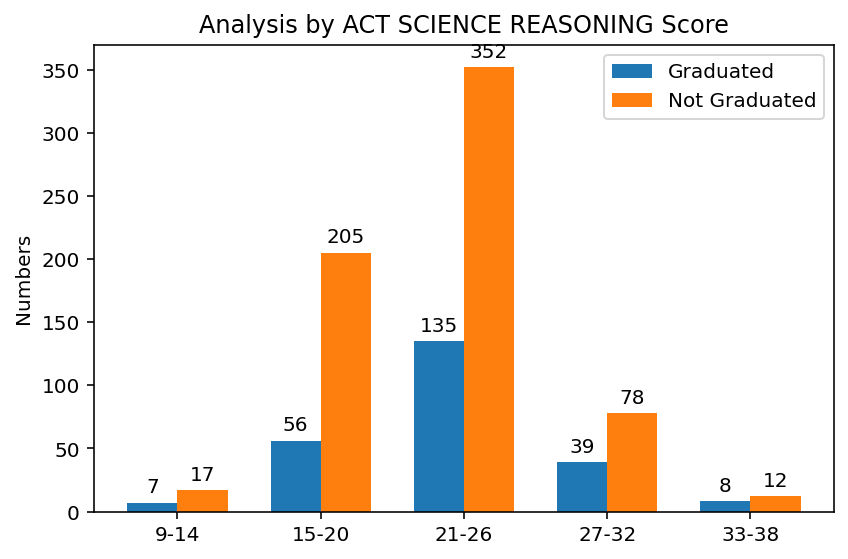

In [198]:
import warnings
warnings.filterwarnings('ignore')

age_range = ['9-14', '15-20', '21-26', '27-32', '33-38']
x = np.arange(len(age_range))
width = 0.35
child_yes = df_yes['ACT_SCIENCE_REASONING_x'].between(9, 14, inclusive=True).sum()
millennial_yes = df_yes['ACT_SCIENCE_REASONING_x'].between(15,20, inclusive=True).sum()
generationX_yes = df_yes['ACT_SCIENCE_REASONING_x'].between(21, 26, inclusive=True).sum()
generationX1_y = df_yes['ACT_SCIENCE_REASONING_x'].between(27, 32, inclusive=True).sum()
generationX2_y = df_yes['ACT_SCIENCE_REASONING_x'].between(33, 38, inclusive=True).sum()

child_no = df_no['ACT_SCIENCE_REASONING_x'].between(9, 14, inclusive=True).sum()
millennial_no = df_no['ACT_SCIENCE_REASONING_x'].between(15,20, inclusive=True).sum()
generationX_no = df_no['ACT_SCIENCE_REASONING_x'].between(21, 26, inclusive=True).sum()
generationX1_n = df_no['ACT_SCIENCE_REASONING_x'].between(27, 32, inclusive=True).sum()
generationX2_n = df_no['ACT_SCIENCE_REASONING_x'].between(33, 38, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, generationX1_y, generationX2_y]
non_graduated_groups = [child_no, millennial_no, generationX_no, generationX1_n, generationX2_n]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Numbers')
ax.set_title('Analysis by ACT SCIENCE REASONING Score')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [135]:
act_composite = df_joined_cp['ACT_COMPOSITE_x'].to_list()
act_comp = []
for i in act_composite:
    if i > 0:
        act_comp.append(i)
print(min(act_comp))
print(max(act_comp))

12.0
34.0


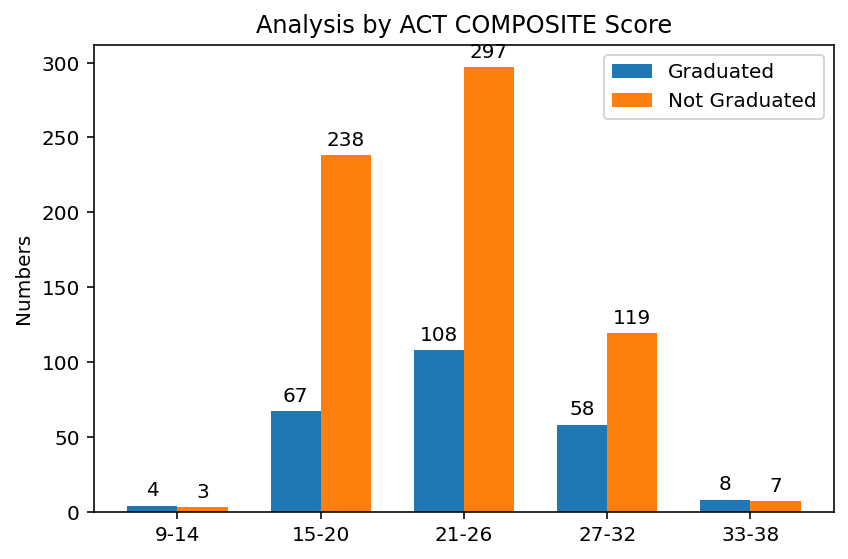

In [199]:
import warnings
warnings.filterwarnings('ignore')

age_range = ['9-14', '15-20', '21-26', '27-32', '33-38']
x = np.arange(len(age_range))
width = 0.35
child_yes = df_yes['ACT_COMPOSITE_x'].between(9, 14, inclusive=True).sum()
millennial_yes = df_yes['ACT_COMPOSITE_x'].between(15,20, inclusive=True).sum()
generationX_yes = df_yes['ACT_COMPOSITE_x'].between(21, 26, inclusive=True).sum()
generationX1_y = df_yes['ACT_COMPOSITE_x'].between(27, 32, inclusive=True).sum()
generationX2_y = df_yes['ACT_COMPOSITE_x'].between(33, 38, inclusive=True).sum()

child_no = df_no['ACT_COMPOSITE_x'].between(9, 14, inclusive=True).sum()
millennial_no = df_no['ACT_COMPOSITE_x'].between(15,20, inclusive=True).sum()
generationX_no = df_no['ACT_COMPOSITE_x'].between(21, 26, inclusive=True).sum()
generationX1_n = df_no['ACT_COMPOSITE_x'].between(27, 32, inclusive=True).sum()
generationX2_n = df_no['ACT_COMPOSITE_x'].between(33, 38, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, generationX1_y, generationX2_y]
non_graduated_groups = [child_no, millennial_no, generationX_no, generationX1_n, generationX2_n]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Numbers')
ax.set_title('Analysis by ACT COMPOSITE Score')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [137]:
gpa = df_joined_cp['CUM_Instiution_GPA'].to_list()
GPA_Score = []
for i in gpa:
    if i > 0:
        GPA_Score.append(i)
print(min(GPA_Score))
print(max(GPA_Score))

2.0
4.0


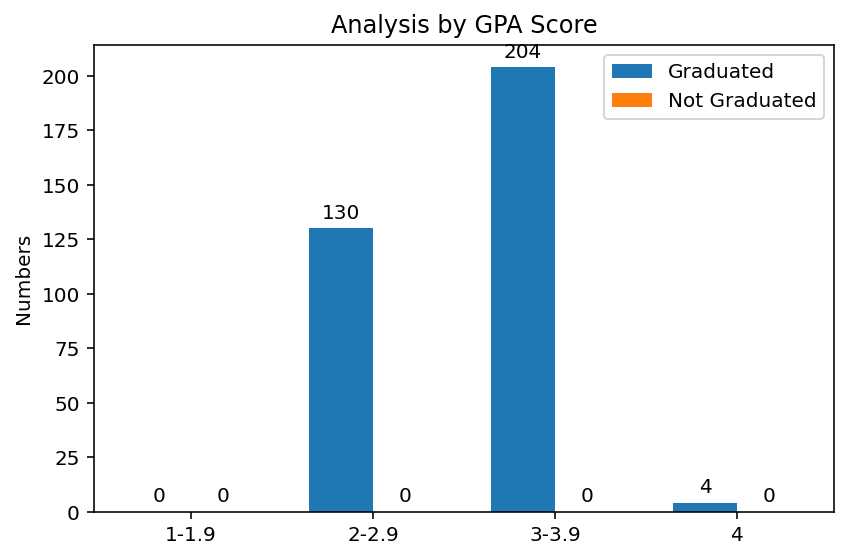

In [200]:
age_range = ['1-1.9','2-2.9', '3-3.9', '4']
x = np.arange(len(age_range))
width = 0.35
child_yes = df_yes['CUM_Instiution_GPA'].between(1, 1.9, inclusive=True).sum()
millennial_yes = df_yes['CUM_Instiution_GPA'].between(2,2.9, inclusive=True).sum()
generationX_yes = df_yes['CUM_Instiution_GPA'].between(3, 3.9, inclusive=True).sum()
generationX1_y = df_yes['CUM_Instiution_GPA'].between(4, 4, inclusive=True).sum()

child_no = df_no['CUM_Instiution_GPA'].between(1, 1.9, inclusive=True).sum()
millennial_no = df_no['CUM_Instiution_GPA'].between(2,2.9, inclusive=True).sum()
generationX_no = df_no['CUM_Instiution_GPA'].between(3, 3.9, inclusive=True).sum()
generationX1_n = df_no['CUM_Instiution_GPA'].between(4, 4, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, generationX1_y]
non_graduated_groups = [child_no, millennial_no, generationX_no, generationX1_n]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

ax.set_ylabel('Numbers')
ax.set_title('Analysis by GPA Score')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [140]:
degree = df_joined_cp['DEG_1_x'].to_list()
degree_name = []
for i in degree:
    if i:
        degree_name.append(i)

<AxesSubplot:xlabel='DEG_1_x', ylabel='count'>

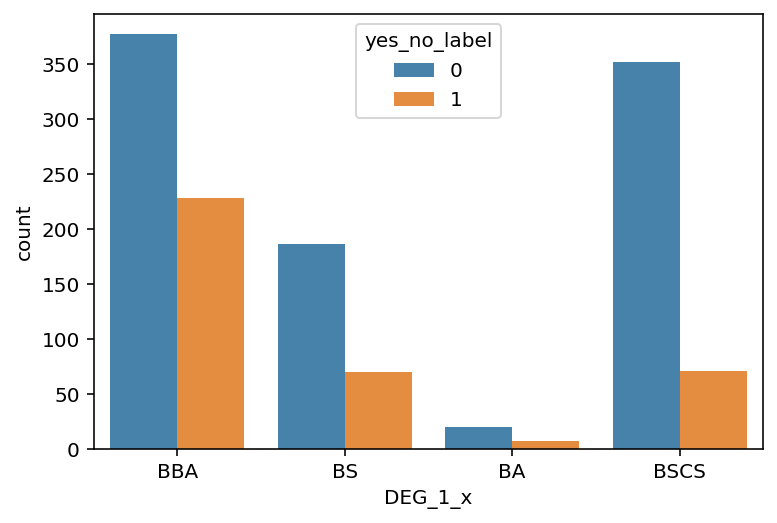

In [141]:
import seaborn as sns
sns.countplot(x="DEG_1_x", hue="yes_no_label", data=df_joined_cp, alpha=0.9)

## Insights from Predicted Label

In [151]:
X = df_joined[df_joined.columns[~df_joined.columns.isin(['yes_no_label', 'Graduate_In_Major'])]]
y = df_joined['yes_no_label']

In [152]:
x_scaled = min_max_scaler.fit_transform(X)
principle_components = pca.fit_transform(x_scaled)

df_predict_data = pd.DataFrame(principle_components)
df_predict_data['yes_no_label'] = y

In [153]:
from torch.utils.data.dataset import Subset
from torch.utils.data import Dataset, DataLoader

predict_dataset = CustomDataset(df_predict_data)
predict_dataloader = DataLoader(dataset=predict_dataset, batch_size=32)
prediction = []
for data, target in predict_dataloader:
    data, target = data, target.to(torch.float32)
    prob_real = model(data).view(-1)
    prediction.extend(prob_real) 
pred_list = [i.item() for i in prediction]
final_pred = []
for i in pred_list:
    if i > 0.50:
        final_pred.append(1)
    else:
        final_pred.append(0)
df_joined_cp["model_prediction"] = final_pred

In [154]:
df_yes_pred = df_joined_cp[df_joined_cp['model_prediction']==1]
df_no_pred = df_joined_cp[df_joined_cp['model_prediction']==0]

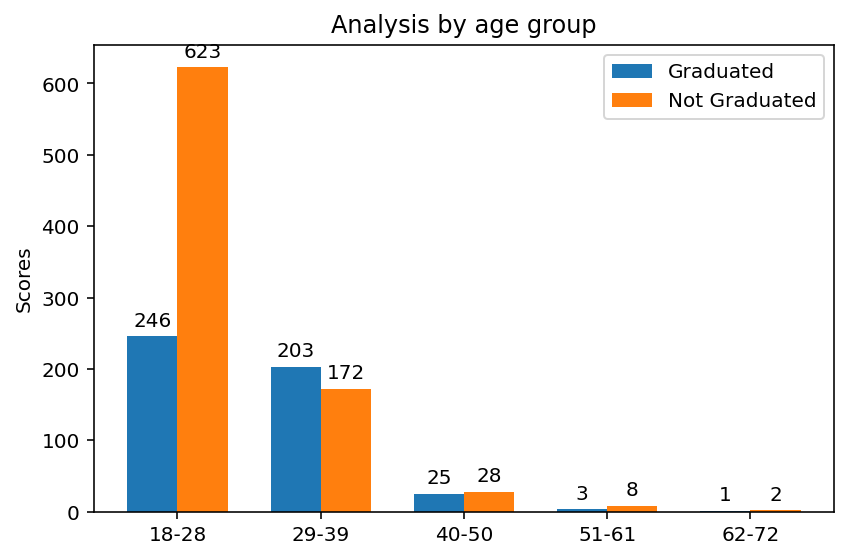

In [191]:
age_range = ['18-28', '29-39', '40-50', '51-61', '62-72']
x = np.arange(len(age_groups))
width = 0.35
child_yes = df_yes_pred['AGE_x'].between(18, 28, inclusive=True).sum()
millennial_yes = df_yes_pred['AGE_x'].between(29,39, inclusive=True).sum()
generationX_yes = df_yes_pred['AGE_x'].between(40, 50, inclusive=True).sum()
boomer_yes = df_yes_pred['AGE_x'].between(51, 61, inclusive=True).sum()
silent_yes = df_yes_pred['AGE_x'].between(62, 72, inclusive=True).sum()

child_no = df_no_pred['AGE_x'].between(18, 28, inclusive=True).sum()
millennial_no = df_no_pred['AGE_x'].between(29,39, inclusive=True).sum()
generationX_no = df_no_pred['AGE_x'].between(40, 50, inclusive=True).sum()
boomer_no = df_no_pred['AGE_x'].between(51, 61, inclusive=True).sum()
silent_no = df_no_pred['AGE_x'].between(62, 72, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, boomer_yes, silent_yes]
non_graduated_groups = [child_no, millennial_no, generationX_no, boomer_no, silent_no]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

ax.set_ylabel('Scores')
ax.set_title('Analysis by age group')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

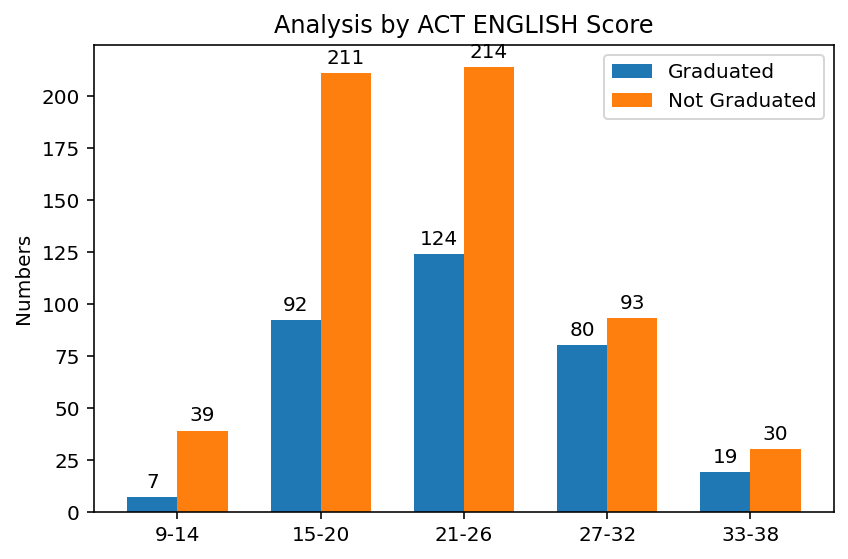

In [190]:
age_range = ['9-14', '15-20', '21-26', '27-32', '33-38']
x = np.arange(len(age_range))
width = 0.35
child_yes = df_yes_pred['ACT_ENGLISH_x'].between(9, 14, inclusive=True).sum()
millennial_yes = df_yes_pred['ACT_ENGLISH_x'].between(15,20, inclusive=True).sum()
generationX_yes = df_yes_pred['ACT_ENGLISH_x'].between(21, 26, inclusive=True).sum()
generationX1_y = df_yes_pred['ACT_ENGLISH_x'].between(27, 32, inclusive=True).sum()
generationX2_y = df_yes_pred['ACT_ENGLISH_x'].between(33, 38, inclusive=True).sum()

child_no = df_no_pred['ACT_ENGLISH_x'].between(9, 14, inclusive=True).sum()
millennial_no = df_no_pred['ACT_ENGLISH_x'].between(15,20, inclusive=True).sum()
generationX_no = df_no_pred['ACT_ENGLISH_x'].between(21, 26, inclusive=True).sum()
generationX1_n = df_no_pred['ACT_ENGLISH_x'].between(27, 32, inclusive=True).sum()
generationX2_n = df_no_pred['ACT_ENGLISH_x'].between(33, 38, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, generationX1_y, generationX2_y]
non_graduated_groups = [child_no, millennial_no, generationX_no, generationX1_n, generationX2_n]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

ax.set_ylabel('Numbers')
ax.set_title('Analysis by ACT ENGLISH Score')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

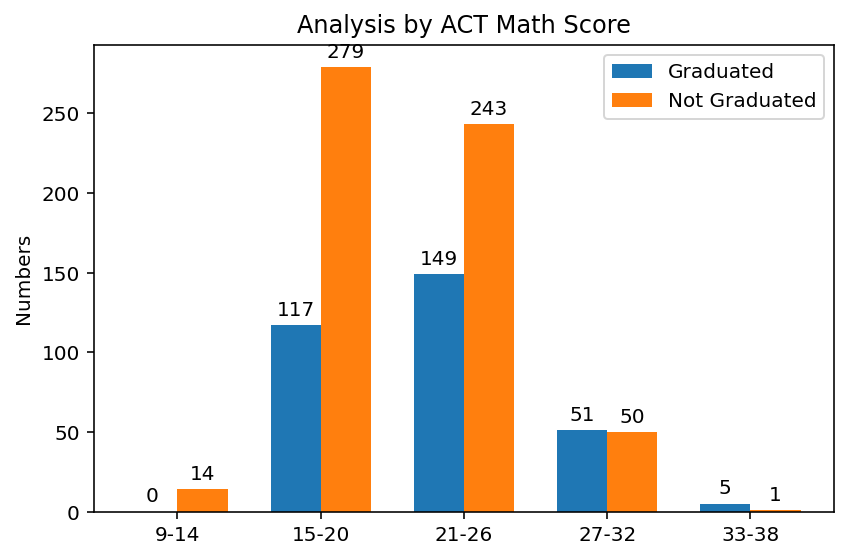

In [189]:
age_range = ['9-14', '15-20', '21-26', '27-32', '33-38']
x = np.arange(len(age_range))
width = 0.35
child_yes = df_yes_pred['ACT_MATH_x'].between(9, 14, inclusive=True).sum()
millennial_yes = df_yes_pred['ACT_MATH_x'].between(15,20, inclusive=True).sum()
generationX_yes = df_yes_pred['ACT_MATH_x'].between(21, 26, inclusive=True).sum()
generationX1_y = df_yes_pred['ACT_MATH_x'].between(27, 32, inclusive=True).sum()
generationX2_y = df_yes_pred['ACT_MATH_x'].between(33, 38, inclusive=True).sum()

child_no = df_no_pred['ACT_MATH_x'].between(9, 14, inclusive=True).sum()
millennial_no = df_no_pred['ACT_MATH_x'].between(15,20, inclusive=True).sum()
generationX_no = df_no_pred['ACT_MATH_x'].between(21, 26, inclusive=True).sum()
generationX1_n = df_no_pred['ACT_MATH_x'].between(27, 32, inclusive=True).sum()
generationX2_n = df_no_pred['ACT_MATH_x'].between(33, 38, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, generationX1_y, generationX2_y]
non_graduated_groups = [child_no, millennial_no, generationX_no, generationX1_n, generationX2_n]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

ax.set_ylabel('Numbers')
ax.set_title('Analysis by ACT Math Score')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

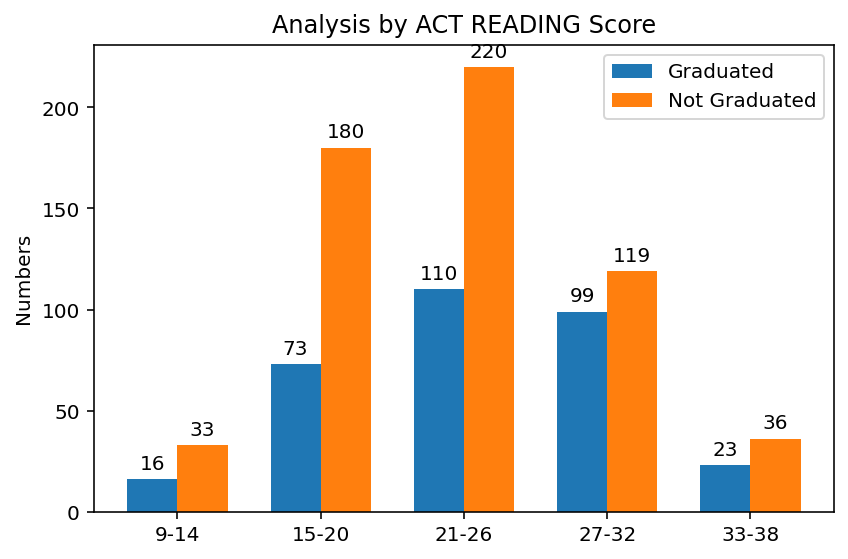

In [188]:
age_range = ['9-14', '15-20', '21-26', '27-32', '33-38']
x = np.arange(len(age_range))
width = 0.35
child_yes = df_yes['ACT_READING_x'].between(9, 14, inclusive=True).sum()
millennial_yes = df_yes_pred['ACT_READING_x'].between(15,20, inclusive=True).sum()
generationX_yes = df_yes_pred['ACT_READING_x'].between(21, 26, inclusive=True).sum()
generationX1_y = df_yes_pred['ACT_READING_x'].between(27, 32, inclusive=True).sum()
generationX2_y = df_yes_pred['ACT_READING_x'].between(33, 38, inclusive=True).sum()

child_no = df_no['ACT_READING_x'].between(9, 14, inclusive=True).sum()
millennial_no = df_no_pred['ACT_READING_x'].between(15,20, inclusive=True).sum()
generationX_no = df_no_pred['ACT_READING_x'].between(21, 26, inclusive=True).sum()
generationX1_n = df_no_pred['ACT_READING_x'].between(27, 32, inclusive=True).sum()
generationX2_n = df_no_pred['ACT_READING_x'].between(33, 38, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, generationX1_y, generationX2_y]
non_graduated_groups = [child_no, millennial_no, generationX_no, generationX1_n, generationX2_n]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

ax.set_ylabel('Numbers')
ax.set_title('Analysis by ACT READING Score')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

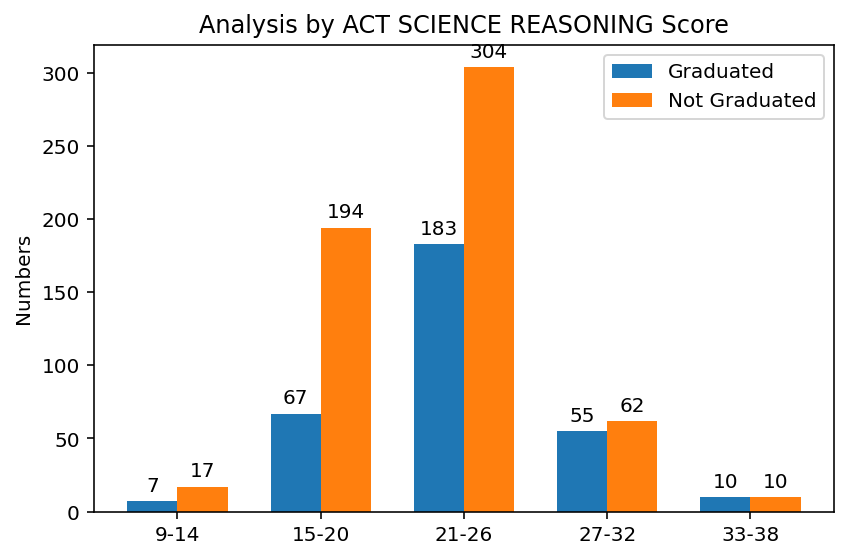

In [187]:
age_range = ['9-14', '15-20', '21-26', '27-32', '33-38']
x = np.arange(len(age_range))
width = 0.35
child_yes = df_yes['ACT_SCIENCE_REASONING_x'].between(9, 14, inclusive=True).sum()
millennial_yes = df_yes_pred['ACT_SCIENCE_REASONING_x'].between(15,20, inclusive=True).sum()
generationX_yes = df_yes_pred['ACT_SCIENCE_REASONING_x'].between(21, 26, inclusive=True).sum()
generationX1_y = df_yes_pred['ACT_SCIENCE_REASONING_x'].between(27, 32, inclusive=True).sum()
generationX2_y = df_yes_pred['ACT_SCIENCE_REASONING_x'].between(33, 38, inclusive=True).sum()

child_no = df_no_pred['ACT_SCIENCE_REASONING_x'].between(9, 14, inclusive=True).sum()
millennial_no = df_no_pred['ACT_SCIENCE_REASONING_x'].between(15,20, inclusive=True).sum()
generationX_no = df_no_pred['ACT_SCIENCE_REASONING_x'].between(21, 26, inclusive=True).sum()
generationX1_n = df_no_pred['ACT_SCIENCE_REASONING_x'].between(27, 32, inclusive=True).sum()
generationX2_n = df_no_pred['ACT_SCIENCE_REASONING_x'].between(33, 38, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, generationX1_y, generationX2_y]
non_graduated_groups = [child_no, millennial_no, generationX_no, generationX1_n, generationX2_n]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

ax.set_ylabel('Numbers')
ax.set_title('Analysis by ACT SCIENCE REASONING Score')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

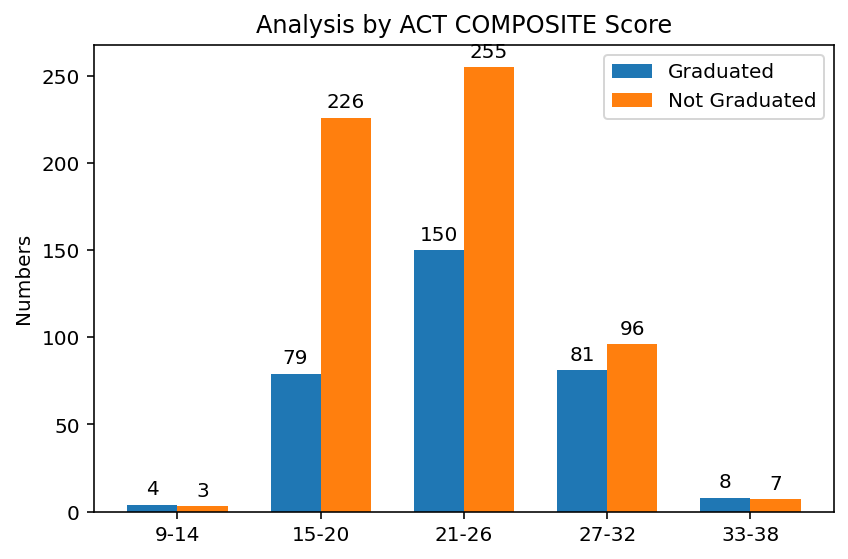

In [180]:
age_range = ['9-14', '15-20', '21-26', '27-32', '33-38']
x = np.arange(len(age_range))
width = 0.35
child_yes = df_yes_pred['ACT_COMPOSITE_x'].between(9, 14, inclusive=True).sum()
millennial_yes = df_yes_pred['ACT_COMPOSITE_x'].between(15,20, inclusive=True).sum()
generationX_yes = df_yes_pred['ACT_COMPOSITE_x'].between(21, 26, inclusive=True).sum()
generationX1_y = df_yes_pred['ACT_COMPOSITE_x'].between(27, 32, inclusive=True).sum()
generationX2_y = df_yes_pred['ACT_COMPOSITE_x'].between(33, 38, inclusive=True).sum()

child_no = df_no_pred['ACT_COMPOSITE_x'].between(9, 14, inclusive=True).sum()
millennial_no = df_no_pred['ACT_COMPOSITE_x'].between(15,20, inclusive=True).sum()
generationX_no = df_no_pred['ACT_COMPOSITE_x'].between(21, 26, inclusive=True).sum()
generationX1_n = df_no_pred['ACT_COMPOSITE_x'].between(27, 32, inclusive=True).sum()
generationX2_n = df_no_pred['ACT_COMPOSITE_x'].between(33, 38, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, generationX1_y, generationX2_y]
non_graduated_groups = [child_no, millennial_no, generationX_no, generationX1_n, generationX2_n]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

ax.set_ylabel('Numbers')
ax.set_title('Analysis by ACT COMPOSITE Score')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

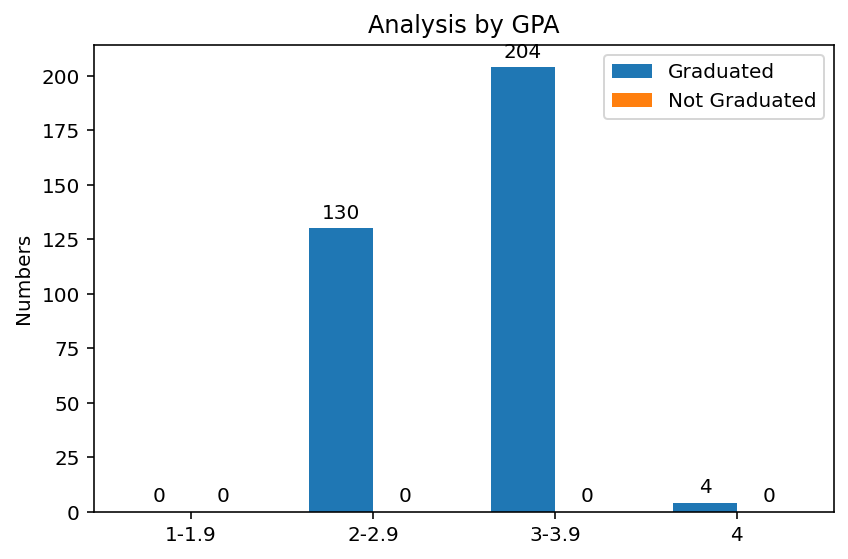

In [179]:
age_range = ['1-1.9','2-2.9', '3-3.9', '4']
x = np.arange(len(age_range))
width = 0.35
child_yes = df_yes_pred['CUM_Instiution_GPA'].between(1, 1.9, inclusive=True).sum()
millennial_yes = df_yes_pred['CUM_Instiution_GPA'].between(2,2.9, inclusive=True).sum()
generationX_yes = df_yes_pred['CUM_Instiution_GPA'].between(3, 3.9, inclusive=True).sum()
generationX1_y = df_yes_pred['CUM_Instiution_GPA'].between(4, 4, inclusive=True).sum()

child_no = df_no_pred['CUM_Instiution_GPA'].between(1, 1.9, inclusive=True).sum()
millennial_no = df_no_pred['CUM_Instiution_GPA'].between(2,2.9, inclusive=True).sum()
generationX_no = df_no_pred['CUM_Instiution_GPA'].between(3, 3.9, inclusive=True).sum()
generationX1_n = df_no_pred['CUM_Instiution_GPA'].between(4, 4, inclusive=True).sum()

graduated_groups = [child_yes, millennial_yes, generationX_yes, generationX1_y]
non_graduated_groups = [child_no, millennial_no, generationX_no, generationX1_n]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduated_groups, width, label='Graduated')
rects2 = ax.bar(x + width/2, non_graduated_groups, width, label='Not Graduated')

ax.set_ylabel('Numbers')
ax.set_title('Analysis by GPA')
ax.set_xticks(x, age_range)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

<AxesSubplot:xlabel='DEG_1_x', ylabel='count'>

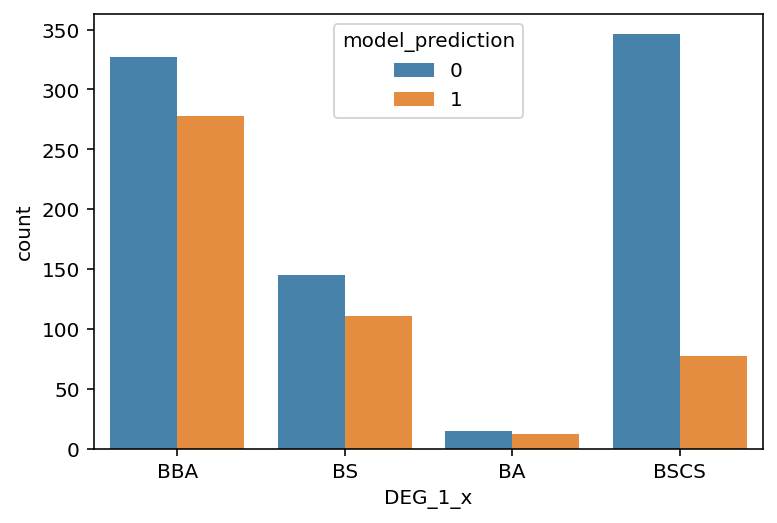

In [193]:
import seaborn as sns
sns.countplot(x="DEG_1_x", hue="model_prediction", data=df_joined_cp, alpha=0.9)